In [1]:
import numpy as np
import matplotlib.pyplot as plt
from getDataset import getDataSet
from sklearn.linear_model import LogisticRegression
import math

from pylab import scatter, show, legend, xlabel, ylabel
from sklearn.utils.validation import column_or_1d


from codeLogit.util import *

In [2]:
def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    # no more variables are needed
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_title(titleMessage)

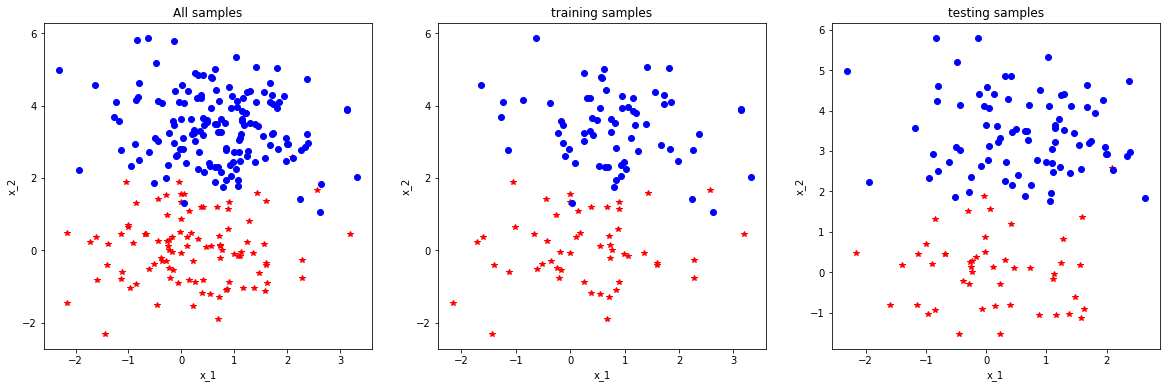

SciKit average error        : 0.02307692 (0.15014786)
Self-developed average error: 0.18461538 (0.38798524)


In [18]:
%run -i "D:\Courses\2019 Fall (Processing)\CS-596 Machine Learning\Assignments\Assignment 3\My Code\main_part1.py"

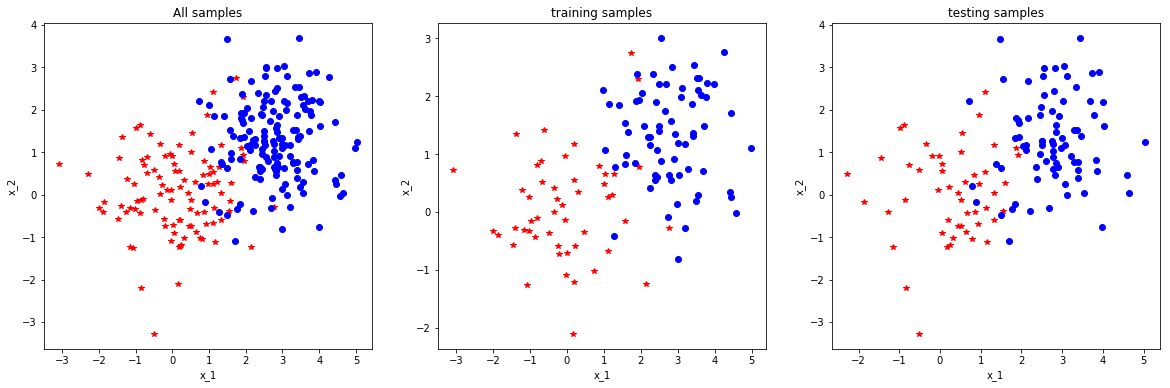

SciKit average error        : 0.09230769 (0.28945981)
Self-developed average error: 0.24615385 (0.43076923)


In [19]:
%run -i "D:\Courses\2019 Fall (Processing)\CS-596 Machine Learning\Assignments\Assignment 3\My Code\main_part1.py"

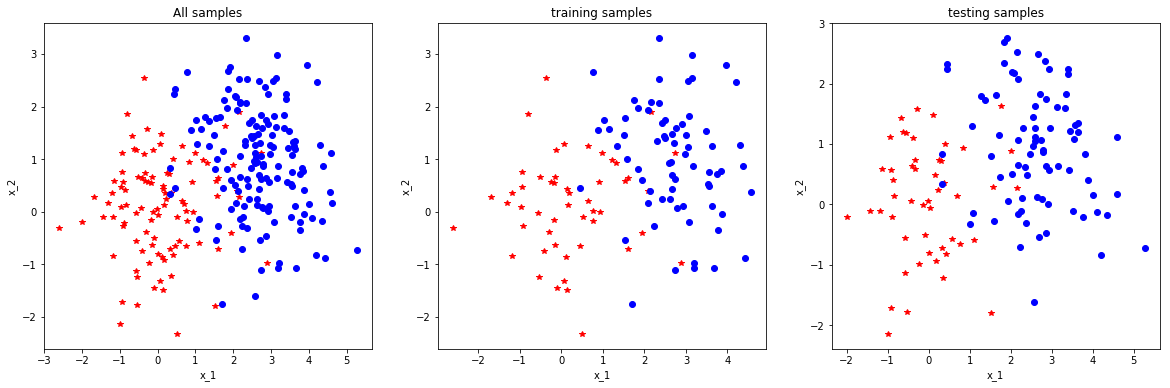

SciKit average error        : 0.09230769 (0.28945981)
Self-developed average error: 0.16153846 (0.36802688)
SciKit confusion matrix:
    0.0 1.0
0.0  46   4
1.0   8  72
Accuracy
0.9076923076923077
Precision and Recall
                0.0       1.0
recall     0.920000  0.900000
precision  0.851852  0.947368
Self_developed confusion matrix:
    0.0 1.0
0.0  29  21
1.0   0  80
Accuracy
0.8384615384615385
Precision and Recall
            0.0       1.0
recall     0.58  1.000000
precision  1.00  0.792079


In [123]:
%run -i "D:\Courses\2019 Fall (Processing)\CS-596 Machine Learning\Assignments\Assignment 3\My Code\main_part1.py"

In [85]:
def func_calConfusionMatrix(predY, trueY):
    labels = np.unique(trueY)
    confusion_mat = pd.DataFrame(columns=labels)
    total_y = len(trueY)
    accuracy = np.sum(predY==trueY) / total_y

    for gt in labels:
        arow=[]
        for pred in labels:
            onecell = np.sum(predY[np.where(trueY ==gt)] == pred)
            arow +=[onecell]
        confusion_mat.loc[gt] = arow
    
    recall = []
    precision = []
    for gt in labels:
        prec_total = confusion_mat[gt].sum()
        recall_total = confusion_mat.loc[gt].sum()
        precision += [confusion_mat[gt][gt]/prec_total]
        recall += [confusion_mat[gt][gt]/recall_total]

    recall_precision_df = pd.DataFrame(columns=labels)
    recall_precision_df.loc['recall'] = recall
    recall_precision_df.loc['precision'] = precision
    
    return accuracy, confusion_mat, recall_precision_df


In [91]:
# print(recall)
recall_score(trueY,predY,average=None)

array([0.94642857, 0.98648649])

In [90]:
# print(precision)
precision_score(trueY,predY,average=None)

array([0.98148148, 0.96052632])

In [114]:
# predY = scikit_yHat

predY = np.asarray(my_yHat)
trueY = testY


conf , score = func_calConfusionMatrix(predY,trueY)

score.loc['recall_my'] = recall_score(trueY,predY,average=None)
score.loc['precision_my'] = precision_score(trueY,predY,average=None)

score.sort_index()

# my_yHat

print(conf)
# print(conf.head())

confusion_matrix(trueY,predY)


    0.0 1.0
0.0  28  28
1.0   0  74


array([[28, 28],
       [ 0, 74]], dtype=int64)